# Data Importing & Describing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
#Importing the data
df = pd.read_csv("credit_risk_dataset.csv",index_col=0)
df.head()

person_income person_home_ownership  person_emp_length  \
person_age                                                           
22                  59000                  RENT              123.0   
21                   9600                   OWN                5.0   
25                   9600              MORTGAGE                1.0   
23                  65500                  RENT                4.0   
24                  54400                  RENT                8.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
person_age                                                                 
22            PERSONAL          D      35000          16.02            1   
21           EDUCATION          B       1000          11.14            0   
25             MEDICAL          C       5500          12.87            1   
23             MEDICAL          C      35000          15.23            1   
24             MEDICAL          C      35000          14.27            1   

            loan_percent_income cb_person_default_on_file  \
person_age                                                  
22                         0.59                         Y   
21                         0.10                         N   
25                         0.57                         N   
23                         0.53                         N   
24                         0.55                         Y   

            cb_person_cred_hist_length  
person_age                              
22                                   3  
21                                   2  
25                                   3  
23                                   2  
24                                   4

In [3]:
df.describe()

person_income  person_emp_length     loan_amnt  loan_int_rate  \
count   3.258100e+04       31686.000000  32581.000000   29465.000000   
mean    6.607485e+04           4.789686   9589.371106      11.011695   
std     6.198312e+04           4.142630   6322.086646       3.240459   
min     4.000000e+03           0.000000    500.000000       5.420000   
25%     3.850000e+04           2.000000   5000.000000       7.900000   
50%     5.500000e+04           4.000000   8000.000000      10.990000   
75%     7.920000e+04           7.000000  12200.000000      13.470000   
max     6.000000e+06         123.000000  35000.000000      23.220000   

        loan_status  loan_percent_income  cb_person_cred_hist_length  
count  32581.000000         32581.000000                32581.000000  
mean       0.218164             0.170203                    5.804211  
std        0.413006             0.106782                    4.055001  
min        0.000000             0.000000                    2.000000  
25%        0.000000             0.090000                    3.000000  
50%        0.000000             0.150000                    4.000000  
75%        0.000000             0.230000                    8.000000  
max        1.000000             0.830000                   30.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 22 to 66
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               32581 non-null  int64  
 1   person_home_ownership       32581 non-null  object 
 2   person_emp_length           31686 non-null  float64
 3   loan_intent                 32581 non-null  object 
 4   loan_grade                  32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.0+ MB


In [5]:
df.nunique()

person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [6]:
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

167

# Preprocessing

Handling the missing data

In [8]:
# Handling missing values
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

In [9]:
# Define features and target
features = ['person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
target = 'loan_status'
X = df[features]
y = df[target]

Defining the categorical and numerical features

In [10]:
# Define the categorical and numerical features
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_features = ['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

Model Initialization

In [11]:
# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create individual classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}  

# Lists to store the results for plotting
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = [] 

# Evaluate each classifier individually
for name, classifier in classifiers.items():
    # Create a pipeline that does the preprocessing and then trains the model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)]) 

# Data Splitting & Model Training

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('classifier', DecisionTreeClassifier())])

In [13]:
# Predict
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Data Visualization

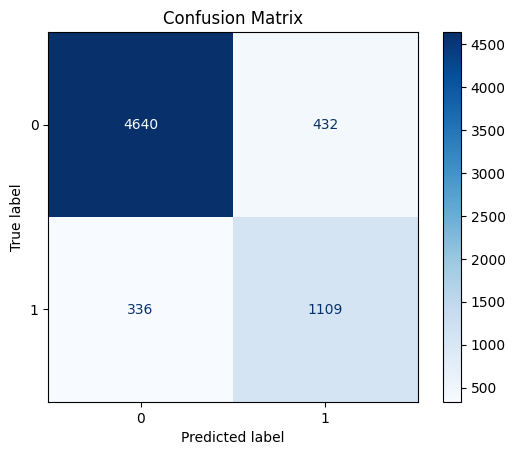

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


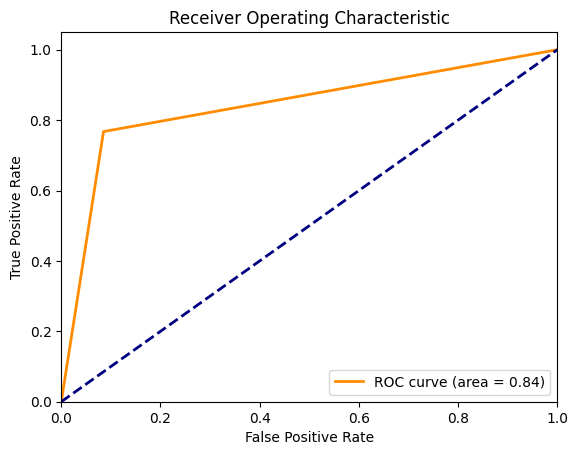

In [15]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Model's Evaluation

Logistic Regression Performance:
Accuracy: 0.8625134264232008
Precision: 0.7678048780487805
Recall: 0.5446366782006921
F1 Score: 0.637246963562753
ROC-AUC: 0.8684503018130614
------------------------------
SVC Performance:
Accuracy: 0.9096209912536443
Precision: 0.9220907297830375
Recall: 0.6470588235294118
F1 Score: 0.7604717364782432
ROC-AUC: 0.8956799253381071
------------------------------
Random Forest Performance:
Accuracy: 0.9298757096823692
Precision: 0.9540441176470589
Recall: 0.7183391003460208
F1 Score: 0.8195815238847217
ROC-AUC: 0.9350777864495214
------------------------------
Gradient Boosting Performance:
Accuracy: 0.9182139021021942
Precision: 0.919889502762431
Recall: 0.6913494809688582
F1 Score: 0.7894112998814697
ROC-AUC: 0.928748990317968
------------------------------
KNN Performance:
Accuracy: 0.8928955040662881
Precision: 0.8410958904109589
Recall: 0.6373702422145329
F1 Score: 0.7251968503937007
ROC-AUC: 0.8709689127088951
------------------------------
Naive Ba

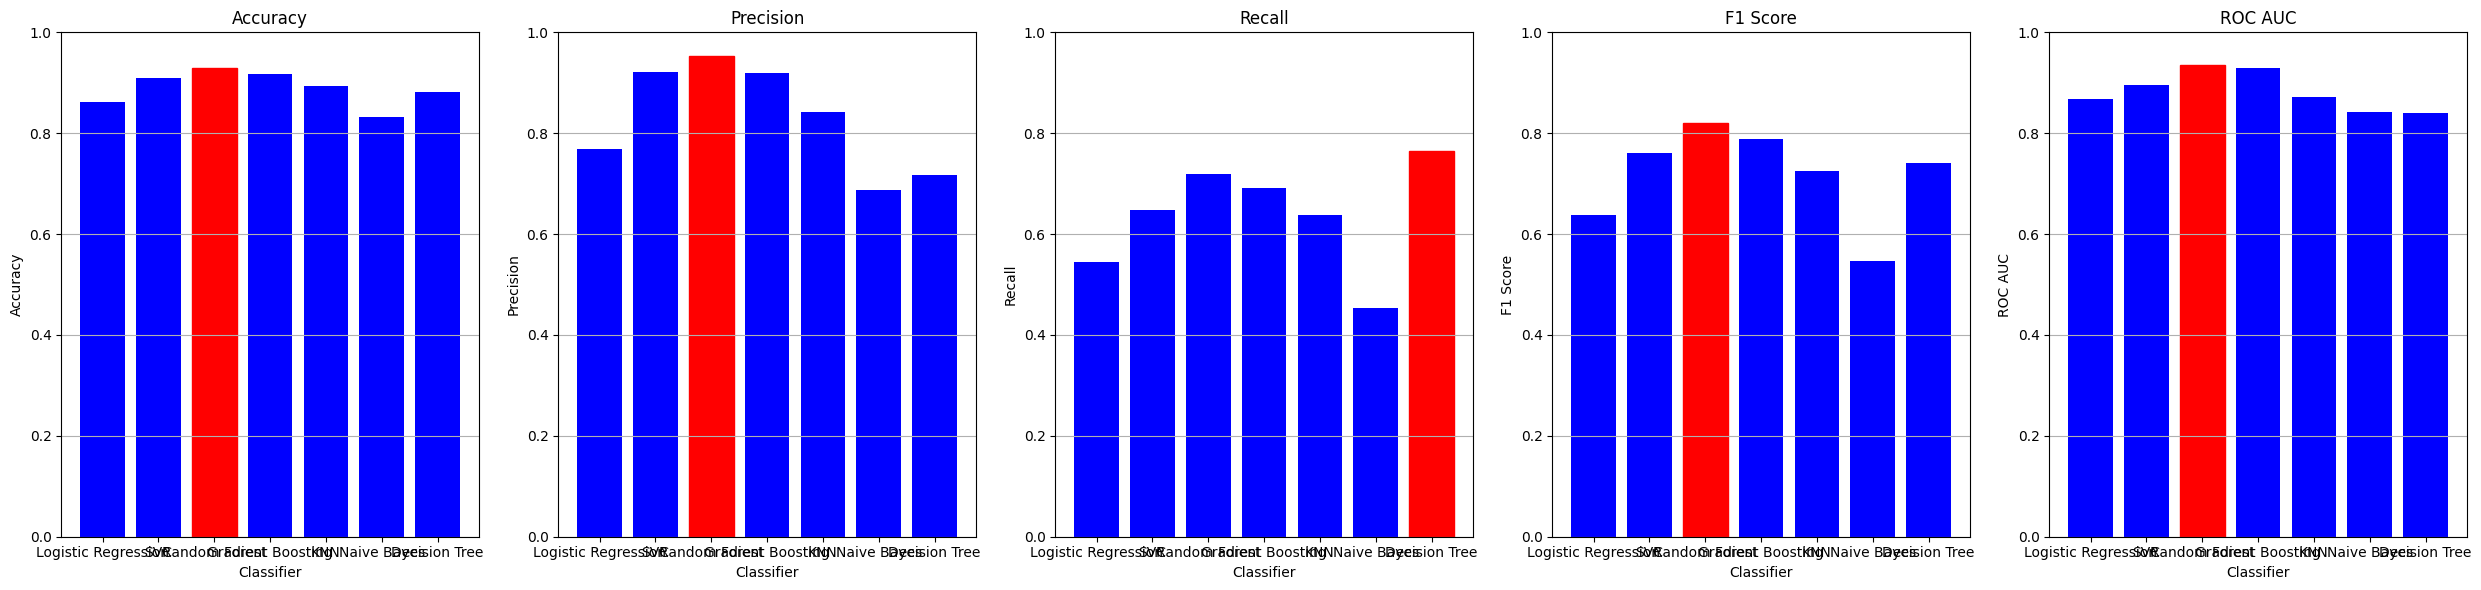

In [18]:
# Lists to store the results for plotting
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for name, classifier in classifiers.items():
    # Create a pipeline that does the preprocessing and then trains the model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model.named_steps['classifier'], "predict_proba") else None
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    
    # Store the results
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)
    
    # Print the results
    print(f'{name} Performance:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    if roc_auc is not None:
        print(f'ROC-AUC: {roc_auc}')
    print('-'*30)

# After the loop, you can check the stored results
print("Stored Results:")
print("Model Names:", model_names)
print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)
print("ROC AUCs:", roc_aucs)

# Function to plot and highlight the highest value in a bar graph
def plot_metric(ax, metric_name, metric_values, model_names):
    max_metric_index = metric_values.index(max(metric_values))
    bars = ax.bar(model_names, metric_values, color='blue')
    bars[max_metric_index].set_color('red')
    ax.set_xlabel('Classifier')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name}')
    ax.set_ylim(0, 1)
    ax.grid(axis='y')

# Plotting bar graphs for each metric side by side
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

plot_metric(axs[0], 'Accuracy', accuracies, model_names)
plot_metric(axs[1], 'Precision', precisions, model_names)
plot_metric(axs[2], 'Recall', recalls, model_names)
plot_metric(axs[3], 'F1 Score', f1_scores, model_names)
plot_metric(axs[4], 'ROC AUC', roc_aucs, model_names)

plt.tight_layout()
plt.show()
